<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook is created for the modelling of the full data using [Scikit-learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

![title](images/scikit_learn_map.png)

<h2><font color=slateblue> Preparing the tools </font></h2>

In [1]:
# Regular EDA
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier, ElasticNet, BayesianRidge, LassoLars
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Save a model
import pickle

<h2><font color=slateblue>Modelling using daily data</font></h2>

<h4><font color=mediumvioletred>Read CSV file</font></h4>

In [2]:
# read prepared dataset csv file
df = pd.read_csv("data/df_prepared_full_data.csv")
df.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
6630,5628,8619.0,2.167984,66.962847,2.003606,289.080057,568.166559,2021,7,20,1,201
426,5625,4514.0,15.719177,181.453281,4.368445,37.005238,601.070037,2021,1,13,2,13
4502,5652,16237.0,6.261871,208.782537,4.326681,166.185891,680.671336,2021,5,17,0,137
2691,5624,4139.0,26.087574,211.672023,2.761285,111.570363,407.808896,2021,3,23,1,82
4494,5621,7166.0,6.351511,208.871004,4.309097,166.005433,676.838848,2021,5,17,0,137


<h4><font color=mediumvioletred>Get X and y</font></h4>

In [3]:
X = df.drop("pm2.5", axis=1)
y = df["pm2.5"]

<h4><font color=mediumvioletred>Get a sample of X </font></h4>

In [4]:
X.sample(5)

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
1173,5657,13961.0,282.516257,2.251706,42.841653,188.821517,2021,2,5,4,36
7612,5645,1875.0,209.389235,3.601133,74.552749,604.066669,2021,8,19,3,231
8449,5642,7052.0,208.527568,2.726696,136.556648,290.026594,2021,9,14,1,257
7476,5617,6514.0,213.164968,3.488963,238.853672,670.272879,2021,8,15,6,227
9773,5632,9770.0,283.881155,3.111123,104.447070,304.116867,2021,10,24,6,297


<h4><font color=mediumvioletred>Get a sample of y </font></h4>

In [5]:
y.sample(5)

6541     4.522504
7954     7.754679
3286    19.797638
65      36.258427
4918     7.075410
Name: pm2.5, dtype: float64

<h4><font color=mediumvioletred>Check shape of the dataframe </font></h4>

In [6]:
df.shape

(10626, 12)

<h4><font color=mediumvioletred>Split data into training and testing </font></h4>

In [7]:
df_train = df[df.month < 8]
df_test = df[df.month >= 8]

len(df_train), len(df_test)

(6996, 3630)

<h4><font color=mediumvioletred>Split data into X & y </font></h4>

In [8]:
X_train, y_train = df_train.drop("pm2.5", axis=1), df_train["pm2.5"]
X_test, y_test = df_test.drop("pm2.5", axis=1), df_test["pm2.5"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6996, 11), (6996,), (3630, 11), (3630,))

In [9]:
X_train.head()

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
0,5611,6671.0,203.334312,2.886824,35.783607,241.558209,2021,1,1,4,1
1,5656,9330.0,202.914324,2.885721,36.077402,243.613262,2021,1,1,4,1
2,5658,1539.0,203.860565,2.900199,35.915225,240.125790,2021,1,1,4,1
3,5612,5478.0,203.603766,2.890154,35.685987,240.507430,2021,1,1,4,1
4,5625,3793.0,204.119216,2.896506,35.493932,238.454701,2021,1,1,4,1


<h4><font color=mediumvioletred>Create a method to evaluate model with Mean Absolute Error (MAE)</font></h4>

MAE is the average of the absolute differences between predictions and actual values.
It gives an idea of how wrong the model's predictions are.

In [10]:
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Testing MAE": mean_absolute_error(y_test, test_preds)
    }
    
    return scores

<h4><font color=mediumvioletred>Create a method to get a dataframe containing actual values, predictions and the differences between the two</font></h4>

In [11]:
def get_scores_dataframe(model):
    test_preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, test_preds)

    df = pd.DataFrame(data={"actual values": y_test,
                           "predicted values": test_preds})

    df["differences"] = np.abs(df["predicted values"] - df["actual values"])

    return df

<h4><font color=mediumvioletred>Model with RandomForestRegressor </font></h4>

In [12]:
rf_model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [13]:
# score model
show_scores(rf_model)

{'Training MAE': 0.04171778584017383, 'Testing MAE': 5.808087347686456}

In [14]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(rf_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10554,52.221626,8.736306,43.485320
10552,52.221626,8.736306,43.485320
10528,52.191574,8.701670,43.489904
10539,52.191574,8.695751,43.495824
10559,52.191574,8.695310,43.496264
10550,52.191574,8.695310,43.496264
10549,52.513554,8.707596,43.805958
10553,53.134212,8.743520,44.390692
10540,53.134212,8.728602,44.405611
10558,53.134212,8.709376,44.424836


<h4><font color=mediumvioletred>Model with SGDClassifier </font></h4>

In [15]:
sgd_model = SGDClassifier(n_jobs=-1,
                        random_state=42)

# fit the model
sgd_model.fit(X_train, y_train.astype(int))

SGDClassifier(n_jobs=-1, random_state=42)

In [16]:
# score model
show_scores(sgd_model)

{'Training MAE': 5.636144156470307, 'Testing MAE': 6.820826154766663}

In [17]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(sgd_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10558,53.134212,7,46.134212
10548,49.394966,3,46.394966
10542,50.327637,3,47.327637
10536,50.327637,3,47.327637
10527,51.049526,3,48.049526
10550,52.191574,3,49.191574
10539,52.191574,3,49.191574
10559,52.191574,3,49.191574
10528,52.191574,3,49.191574
10553,53.134212,3,50.134212


<h4><font color=mediumvioletred>Model with BayesianRidge </font></h4>

In [18]:
br_model = BayesianRidge()

# fit the model
br_model.fit(X_train, y_train)

BayesianRidge()

In [19]:
# score model
show_scores(br_model)

{'Training MAE': 4.493719072780842, 'Testing MAE': 12.533384729521654}

In [20]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(br_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10538,52.221626,-2.137597,54.359223
10556,52.221626,-2.141879,54.363505
10552,52.221626,-2.145186,54.366812
10532,52.221626,-2.161142,54.382768
10534,52.221626,-2.162837,54.384464
10547,52.221626,-2.182549,54.404175
10549,52.513554,-2.066935,54.580489
10553,53.134212,-2.028515,55.162728
10558,53.134212,-2.068599,55.202812
10540,53.134212,-2.073668,55.207880


<h4><font color=mediumvioletred>Model with Lasso </font></h4>

In [21]:
lasso_model = LassoLars(alpha=.1, 
                  normalize=False,
                  random_state=42)

# fit the model
lasso_model.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False, random_state=42)

In [22]:
# score model
show_scores(lasso_model)

{'Training MAE': 4.718627988121286, 'Testing MAE': 9.193399983957317}

In [23]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(lasso_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10556,52.221626,3.399523,48.822104
10538,52.221626,3.392149,48.829477
10534,52.221626,3.390166,48.831460
10532,52.221626,3.388391,48.833236
10552,52.221626,3.387409,48.834217
10547,52.221626,3.378918,48.842708
10549,52.513554,3.456812,49.056741
10540,53.134212,3.488185,49.646028
10558,53.134212,3.459423,49.674790
10553,53.134212,3.457639,49.676573


<h4><font color=mediumvioletred>Model with ElasticNet </font></h4>

In [24]:
en_model = ElasticNet(random_state=42)

# fit the model
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [25]:
# score model
show_scores(en_model)

{'Training MAE': 4.711480312254824, 'Testing MAE': 9.081408868592785}

In [26]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(en_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10556,52.221626,3.069623,49.152003
10554,52.221626,3.066803,49.154823
10547,52.221626,3.064831,49.156795
10532,52.221626,3.064592,49.157034
10538,52.221626,3.055465,49.166161
10552,52.221626,3.052110,49.169516
10549,52.513554,3.092049,49.421505
10540,53.134212,3.143768,49.990444
10558,53.134212,3.100039,50.034173
10553,53.134212,3.066014,50.068198


<h4><font color=mediumvioletred>Model with SVR </font></h4>

In [27]:
svr_model = SVR()

# fit the model
svr_model.fit(X_train, y_train)

SVR()

In [28]:
# score model
show_scores(svr_model)

{'Training MAE': 5.333511269470986, 'Testing MAE': 5.7497847250923115}

In [29]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(svr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10554,52.221626,11.453576,40.768050
10552,52.221626,11.412368,40.809258
10556,52.221626,10.988021,41.233605
10385,49.336040,8.068439,41.267601
10532,52.221626,10.443014,41.778612
10534,52.221626,10.269881,41.951745
10549,52.513554,10.431605,42.081948
10547,52.221626,9.809105,42.412522
10558,53.134212,10.181038,42.953174
10540,53.134212,8.129580,45.004633


<h4><font color=mediumvioletred>Model with GradientBoostingRegressor </font></h4>

In [30]:
gbr_model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1, 
                                  max_depth=1,
                                  random_state=42)

# fit the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [31]:
# score model
show_scores(gbr_model)

{'Training MAE': 3.702118080860074, 'Testing MAE': 5.003318273816123}

In [32]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(gbr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10552,52.221626,16.393411,35.828215
10538,52.221626,16.393411,35.828215
10547,52.221626,16.393411,35.828215
10554,52.221626,16.393411,35.828215
10534,52.221626,16.393411,35.828215
10549,52.513554,16.393411,36.120142
10427,45.380806,9.213524,36.167282
10558,53.134212,16.393411,36.740801
10553,53.134212,16.393411,36.740801
10540,53.134212,16.393411,36.740801


<h4><font color=mediumvioletred>Conclusion </font></h4>

After calculating the MAE (average of the absolute differences between predictions and actual values), we found that the following models had the best predictions:
* GradientBoostingRegressor: 5.003318273816123
* SVR: 5.7497847250923115
* RandomForestRegressor: 5.808087347686456

**After using more data (from 2021-01-01 to 2021-11-18), the models' scores improved a bit.
However, the maximum value is still too high, this is because there are unhandled outliers.**

<h4><font color=mediumvioletred>Check feature importance</font></h4>

Feature importance means which features affected the model the most.

In [33]:
gbr_model.feature_importances_

array([0.        , 0.        , 0.04223137, 0.00725066, 0.05456352,
       0.60346652, 0.        , 0.01597499, 0.03872019, 0.01141425,
       0.2263785 ])

In [34]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

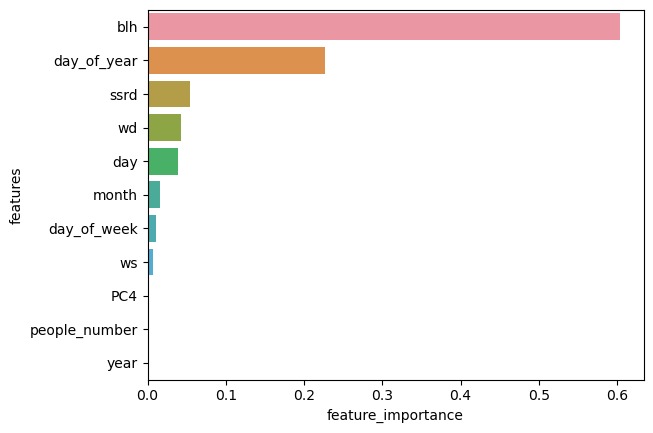

In [35]:
plot_features(X_train.columns, gbr_model.feature_importances_)

The columns which affected the model the most are boundary layer height, day of year, solar sun radiation, wind direction and day.

The model was unable to identify a pattern or correlation between the number of people and the PM2.5 due to the fact that during rush hours, both the number of people and the PM2.5 (pollution level) rise, and when people arrive at their destinations, the number of people stays very high while the pollution level declines.

Given that the zip codes are in the same city and have the same weather, it was likewise unable to establish a link between the zip code (PC4) and the PM2.5.

<h4><font color=mediumvioletred>Export the best model (GradientBoostingRegressor)</font></h4>

In [36]:
pickle.dump(gbr_model, open("models/gbr_air_quality_prediction_model_daily.pkl", "wb")) # wb = write binary

<h4><font color=mediumvioletred>Load the exported model and test it</font></h4>

In [37]:
loaded_model = pickle.load(open("models/gbr_air_quality_prediction_model_daily.pkl", "rb"))
show_scores(loaded_model)

{'Training MAE': 3.702118080860074, 'Testing MAE': 5.003318273816123}

**After modelling, we discussed the results with Georgiana Manolache and she advised us to group the data by week and also include a column to identify the season to see if the predictions can be improved any further.**

<h2><font color=slateblue>Modelling using weekly data</font></h2>

<h4><font color=mediumvioletred>Get sample of the dataframe</font></h4>

In [38]:
df.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
8100,5627,12950.0,14.344079,41.658527,2.985780,219.576099,433.902685,2021,9,3,4,246
3146,5642,3682.0,4.347934,161.782321,5.085437,181.047688,934.496989,2021,4,6,1,96
5802,5615,8128.0,9.090640,231.686263,2.865940,137.256303,428.991548,2021,6,25,4,176
7963,5627,9262.0,7.415440,90.234414,3.921073,119.493995,587.202979,2021,8,30,0,242
8301,5622,4872.0,14.407285,264.382458,2.332772,144.603451,296.361780,2021,9,9,3,252


<h4><font color=mediumvioletred>Add date column</font></h4>

In [39]:
df["date"] = df[df.columns[7:10]].apply(
    lambda x: "-".join(x.astype(str)), axis=1)

df["date"] = df["date"].astype("datetime64[ns]")

<h4><font color=mediumvioletred>Calculate week number from date</font></h4>

In [40]:
df['week_number'] = df['date'].dt.isocalendar().week

<h4><font color=mediumvioletred>Add season from date</font></h4>

1 = spring, 2 = summer, 3 = autumn, 4 = winter

In [41]:
date_offset = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

df['season'] = pd.cut(date_offset, [0, 300, 602, 900, 1300], 
                      labels=[1, 2, 3, 4])

<h4><font color=mediumvioletred>Get sample of the dataframe</font></h4>

In [42]:
df.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year,date,week_number,season
5173,5615,7531.0,6.322732,115.187039,3.230230,272.522592,717.010400,2021,6,6,6,157,2021-06-06,22,1
4447,5614,5572.0,15.175986,225.627920,2.940517,166.189292,599.794189,2021,5,15,5,135,2021-05-15,19,1
9850,5616,15296.0,13.687483,231.495033,4.790317,58.932811,573.343130,2021,10,26,1,299,2021-10-26,43,3
2219,5629,5373.0,24.879129,177.548410,3.390134,73.355468,467.669665,2021,3,9,1,68,2021-03-09,10,4
2047,5646,8441.0,25.683588,100.151343,2.349924,31.549687,364.327524,2021,3,4,3,63,2021-03-04,9,4


<h4><font color=mediumvioletred>Group the dataframe by area and week number</font></h4>

In [43]:
df_weekly = df.groupby(["PC4", "week_number"]).agg({"pm2.5": "mean", "wd": "mean", "ws": "mean", "ssrd": "mean", "blh": "mean", "people_number": "sum", "season": lambda x: x.iloc[1]}).reset_index()

<h4><font color=mediumvioletred>Get data for zip code 5615</font></h4>

In [44]:
df_weekly[df_weekly.PC4 == 5615][:20]

,PC4,week_number,pm2.5,wd,ws,ssrd,blh,people_number,season
188,5615,1,22.424890,123.330978,3.164777,21.008967,379.766082,28493.0,4
189,5615,2,18.903186,169.627734,3.944949,28.743293,514.425679,27307.0,4
190,5615,3,11.120214,226.768988,5.543433,31.394141,743.666952,30429.0,4
191,5615,4,18.344876,179.207799,4.210786,36.645872,509.488630,28045.0,4
192,5615,5,21.561596,176.674427,3.935283,27.183599,397.629005,27235.0,4
193,5615,6,19.029066,94.393184,3.925097,84.693781,418.111591,24106.0,4
194,5615,7,11.750731,259.523227,4.890734,71.262752,511.467894,28397.0,4
195,5615,8,12.148209,170.615613,3.362601,101.748600,443.092117,30787.0,4
196,5615,9,26.518792,115.733766,2.529431,114.709032,357.538443,35263.0,4
197,5615,10,16.075805,203.702675,5.696211,94.621430,935.631505,34303.0,4


<h4><font color=mediumvioletred>Export weekly dataframe to csv</font></h4>

In [45]:
df_weekly.to_csv("data/df_prepared_full_data_weekly.csv")

<h4><font color=mediumvioletred>Get X and y</font></h4>

In [46]:
X = df_weekly.drop("pm2.5", axis=1)
y = df_weekly["pm2.5"]

<h4><font color=mediumvioletred>Get a sample of X </font></h4>

In [47]:
X.sample(5)

,PC4,week_number,wd,ws,ssrd,blh,people_number,season
1230,5652,9,116.764121,2.536931,114.498806,358.210478,78136.0,4
374,5621,46,156.867840,3.077428,32.296591,358.944268,37765.0,3
994,5643,8,170.628409,3.352767,101.886700,443.606924,25015.0,4
1286,5653,18,222.589313,4.767209,201.273980,904.342806,61541.0,1
32,5611,33,213.109664,3.702246,125.463477,571.176939,94711.0,2


<h4><font color=mediumvioletred>Get a sample of y </font></h4>

In [48]:
y.sample(5)

1224    11.108368
610     29.241585
489      8.648423
774      5.114612
794     10.513809
Name: pm2.5, dtype: float64

<h4><font color=mediumvioletred>Check shape of the dataframe </font></h4>

In [49]:
df_weekly.shape

(1551, 9)

<h4><font color=mediumvioletred>Split data into training and testing </font></h4>

In [50]:
df_train = df_weekly[df_weekly.week_number < 38]
df_test = df_weekly[df_weekly.week_number >= 38]

len(df_train), len(df_test)

(1221, 330)

<h4><font color=mediumvioletred>Split data into X & y </font></h4>

In [51]:
X_train, y_train = df_train.drop("pm2.5", axis=1), df_train["pm2.5"]
X_test, y_test = df_test.drop("pm2.5", axis=1), df_test["pm2.5"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1221, 8), (1221,), (330, 8), (330,))

<h4><font color=mediumvioletred>Model with RandomForestRegressor </font></h4>

In [52]:
rf_model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [53]:
# score model
show_scores(rf_model)

{'Training MAE': 0.024578897184108016, 'Testing MAE': 6.072975797769487}

In [54]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(rf_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
45,34.319192,14.292401,20.026791
327,34.319192,14.289023,20.030169
186,34.319192,14.289023,20.030169
233,34.319192,14.289023,20.030169
280,34.319192,14.289023,20.030169
139,34.319192,14.289023,20.030169
1173,34.355470,14.269965,20.085505
1455,34.680089,14.342753,20.337337
1361,34.680089,14.337298,20.342791
1079,34.680089,14.274116,20.405973


<h4><font color=mediumvioletred>Model with SGDClassifier </font></h4>

In [55]:
sgd_model = SGDClassifier(n_jobs=-1,
                        random_state=42)

# fit the model
sgd_model.fit(X_train, y_train.astype(int))

SGDClassifier(n_jobs=-1, random_state=42)

In [56]:
# score model
show_scores(sgd_model)

{'Training MAE': 4.228876435507023, 'Testing MAE': 8.53119431230069}

In [57]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(sgd_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
327,34.319192,11,23.319192
280,34.319192,11,23.319192
92,34.319192,11,23.319192
139,34.319192,11,23.319192
186,34.319192,11,23.319192
233,34.319192,11,23.319192
1173,34.355470,11,23.355470
1079,34.680089,11,23.680089
1361,34.680089,11,23.680089
1455,34.680089,11,23.680089


<h4><font color=mediumvioletred>Model with GradientBoostingRegressor </font></h4>

In [58]:
gbr_model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1, 
                                  max_depth=1,
                                  random_state=42)

# fit the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [59]:
# score model
show_scores(gbr_model)

{'Training MAE': 1.1943743662594815, 'Testing MAE': 7.398151531788652}

In [60]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(gbr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
186,34.319192,15.462908,18.856284
45,34.319192,15.462908,18.856284
280,34.319192,15.462908,18.856284
139,34.319192,15.462908,18.856284
327,34.319192,15.462908,18.856284
233,34.319192,15.462908,18.856284
1173,34.355470,15.462908,18.892562
1079,34.680089,15.462908,19.217181
1455,34.680089,15.462908,19.217181
1361,34.680089,15.462908,19.217181


<h4><font color=mediumvioletred>Model with BayesianRidge </font></h4>

In [61]:
br_model = BayesianRidge()

# fit the model
br_model.fit(X_train, y_train)

BayesianRidge()

In [62]:
# score model
show_scores(br_model)

{'Training MAE': 2.3344465343406453, 'Testing MAE': 8.503177539345117}

In [63]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(br_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
233,34.319192,10.724954,23.594238
280,34.319192,10.724078,23.595114
186,34.319192,10.709456,23.609736
327,34.319192,10.704694,23.614498
139,34.319192,10.677221,23.641971
45,34.319192,10.661235,23.657957
92,34.319192,10.625715,23.693477
1361,34.680089,10.880571,23.799518
1079,34.680089,10.765126,23.914963
1455,34.680089,10.669848,24.010241


<h4><font color=mediumvioletred>Model with Lasso </font></h4>

In [64]:
lasso_model = LassoLars(alpha=.1, 
                  normalize=False,
                  random_state=42)

# fit the model
lasso_model.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False, random_state=42)

In [65]:
# score model
show_scores(lasso_model)

{'Training MAE': 2.3416797240304987, 'Testing MAE': 8.602986638895269}

In [66]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(lasso_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
280,34.319192,10.425495,23.893697
233,34.319192,10.425011,23.894181
186,34.319192,10.409504,23.909688
327,34.319192,10.407024,23.912168
139,34.319192,10.379159,23.940033
45,34.319192,10.365094,23.954098
92,34.319192,10.331649,23.987543
1361,34.680089,10.563518,24.116571
1079,34.680089,10.453654,24.226435
1455,34.680089,10.359558,24.320532


<h4><font color=mediumvioletred>Model with ElasticNet </font></h4>

In [67]:
en_model = ElasticNet(random_state=42)

# fit the model
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [68]:
# score model
show_scores(en_model)

{'Training MAE': 2.422679766416977, 'Testing MAE': 8.626299350617332}

In [69]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(en_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
233,34.319192,10.069607,24.249585
186,34.319192,10.054422,24.264770
327,34.319192,10.051926,24.267266
1173,34.355470,10.063046,24.292424
139,34.319192,10.026660,24.292532
45,34.319192,10.016471,24.302721
92,34.319192,9.983285,24.335907
1361,34.680089,10.144288,24.535801
1079,34.680089,10.046733,24.633356
1455,34.680089,9.932617,24.747472


<h4><font color=mediumvioletred>Model with SVR </font></h4>

In [70]:
svr_model = SVR()

# fit the model
svr_model.fit(X_train, y_train)

SVR()

In [71]:
# score model
show_scores(svr_model)

{'Training MAE': 3.913479596322271, 'Testing MAE': 7.805045466821868}

In [72]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(svr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
186,34.319192,11.374957,22.944235
609,32.812274,9.789342,23.022932
139,34.319192,10.966573,23.352619
1220,32.812274,9.420553,23.391721
1173,34.355470,10.868781,23.486689
1267,33.525037,9.902843,23.622194
45,34.319192,10.689036,23.630156
92,34.319192,10.260789,24.058403
1079,34.680089,10.477429,24.202660
1455,34.680089,9.298868,25.381221


<h4><font color=mediumvioletred>Conclusion </font></h4>

After calculating the MAE (average of the absolute differences between predictions and actual values), we found that the following models had the best predictions:
* RandomForestRegressor: 6.0729757977694865
* GradientBoostingRegressor: 7.398151531788652
* SVR: 7.805045466821868

**After using more data (from 2021-01-01 to 2021-11-18) and grouping the data by week, the models' scores improved a bit.
However, the maximum value is still too high, this is because there are unhandled outliers.**

<h4><font color=mediumvioletred>Check feature importance</font></h4>

Feature importance means which features affected the model the most.

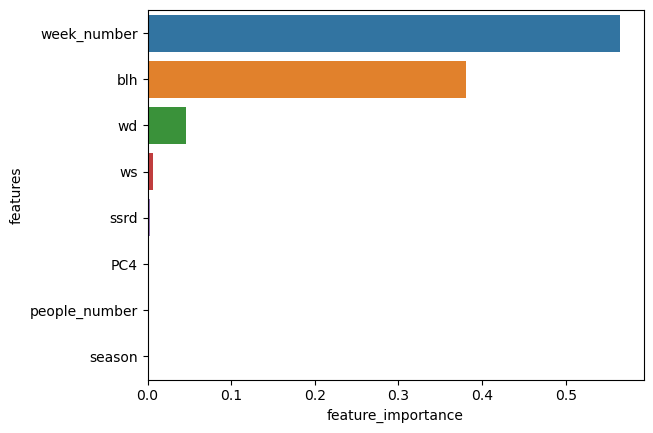

In [73]:
# GradientBoostingRegressor model
plot_features(X_train.columns, gbr_model.feature_importances_)

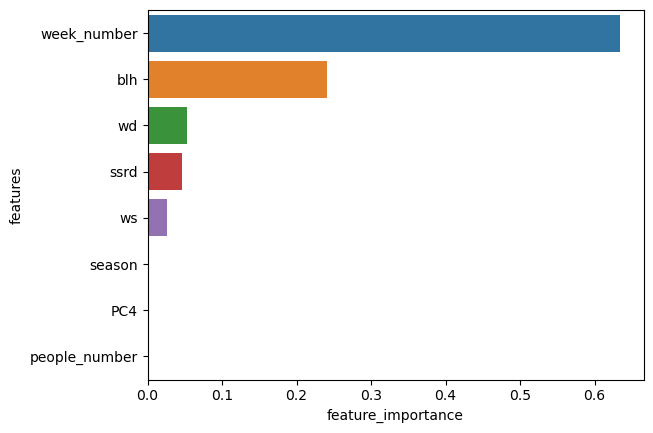

In [74]:
# RandomForestRegressor model
plot_features(X_train.columns, rf_model.feature_importances_)

The columns which affected the best models the most are week number, boundary layer height, wind direction, solar sun radiation and wind speed.

The model was unable to identify a pattern or correlation between the number of people and the PM2.5 due to the fact that during rush hours, both the number of people and the PM2.5 pollution level rise, and when people arrive at their destinations, the number of people stays very high while the pollution level declines.

Given that the zip codes are in the same city and have the same weather, it was likewise unable to establish a link between the zip code (PC4) and the PM2.5.

Including the season column had no effect on the model.

<h4><font color=mediumvioletred>Export the best model (GradientBoostingRegressor and RandomForestRegressor)</font></h4>

In [75]:
pickle.dump(gbr_model, open("models/gbr_air_quality_prediction_model_weekly.pkl", "wb")) # wb = write binary
pickle.dump(rf_model, open("models/rf_air_quality_prediction_model_weekly.pkl", "wb")) # wb = write binary

<h2><font color=slateblue>Modelling using daily data after handling outliers</font></h2>


[Outliers Handling notebook](http://localhost:8888/notebooks/outliers_handling.ipynb)

<h3><font color=steelblue>Remove pm2.5 outliers</font></h3>

<h4><font color=mediumvioletred>Read CSV file</font></h4>

In [76]:
# read prepared dataset csv file
df_removed_pollution_outliers = pd.read_csv("data/df_removed_pollution_outliers.csv")
df_removed_pollution_outliers.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
1038,5615,2839.0,9.779159,32.547832,5.702684,45.588409,642.921627,2021,2,8,0,39
8819,5628,10039.0,13.711193,227.716389,1.366589,91.438658,188.431297,2021,10,7,3,280
6759,5632,7550.0,14.283206,244.561743,1.437618,232.909029,500.001706,2021,8,5,3,217
8257,5621,10587.0,11.350349,30.348947,3.435787,149.898047,673.660896,2021,9,20,0,263
2808,5615,2119.0,5.813819,172.930971,5.699418,152.958417,881.852084,2021,4,7,2,97


<h4><font color=mediumvioletred>Get X and y</font></h4>

In [77]:
X = df_removed_pollution_outliers.drop("pm2.5", axis=1)
y = df_removed_pollution_outliers["pm2.5"]

<h4><font color=mediumvioletred>Get a sample of X </font></h4>

In [78]:
X.sample(5)

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
2896,5656,24198.0,177.876603,3.512219,159.569498,665.939185,2021,4,9,4,99
1602,5616,4184.0,198.471648,3.070379,101.717393,334.075010,2021,2,25,3,56
733,5658,2085.0,223.206884,4.485798,12.837579,477.358212,2021,1,27,2,27
753,5644,9690.0,223.796506,4.486470,12.650117,480.808694,2021,1,27,2,27
5083,5625,9497.0,62.374768,2.467528,216.531996,507.702881,2021,6,15,1,166


<h4><font color=mediumvioletred>Get a sample of y </font></h4>

In [79]:
y.sample(5)

380     19.927547
7982    11.444376
9564     7.186676
6156     4.584603
2189     8.216897
Name: pm2.5, dtype: float64

<h4><font color=mediumvioletred>Check shape of the dataframe </font></h4>

In [80]:
df_removed_pollution_outliers.shape

(10066, 12)

<h4><font color=mediumvioletred>Split data into training and testing </font></h4>

In [81]:
df_train = df_removed_pollution_outliers[df_removed_pollution_outliers.month < 8]
df_test = df_removed_pollution_outliers[df_removed_pollution_outliers.month >= 8]

len(df_train), len(df_test)

(6602, 3464)

<h4><font color=mediumvioletred>Split data into X & y </font></h4>

In [82]:
X_train, y_train = df_train.drop("pm2.5", axis=1), df_train["pm2.5"]
X_test, y_test = df_test.drop("pm2.5", axis=1), df_test["pm2.5"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6602, 11), (6602,), (3464, 11), (3464,))

In [83]:
X_train.head()

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
0,5611,6671.0,203.334312,2.886824,35.783607,241.558209,2021,1,1,4,1
1,5656,9330.0,202.914324,2.885721,36.077402,243.613262,2021,1,1,4,1
2,5658,1539.0,203.860565,2.900199,35.915225,240.125790,2021,1,1,4,1
3,5612,5478.0,203.603766,2.890154,35.685987,240.507430,2021,1,1,4,1
4,5625,3793.0,204.119216,2.896506,35.493932,238.454701,2021,1,1,4,1


<h4><font color=mediumvioletred>Model with RandomForestRegressor </font></h4>

In [84]:
rf_model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [85]:
# score model
show_scores(rf_model)

{'Training MAE': 0.0363452506677486, 'Testing MAE': 4.602450789580377}

In [86]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(rf_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
9952,28.459488,7.824755,20.634733
9931,28.534494,7.803945,20.730550
9953,28.534494,7.803385,20.731109
9932,28.534494,7.800248,20.734246
9951,28.534494,7.794669,20.739826
9943,28.637873,7.820064,20.817808
9948,28.637873,7.812657,20.825216
9945,28.637873,7.809103,20.828770
9937,28.637873,7.802273,20.835599
9957,28.637873,7.801922,20.835950


<h4><font color=mediumvioletred>Model with SGDClassifier </font></h4>

In [87]:
sgd_model = SGDClassifier(n_jobs=-1,
                        random_state=42)

# fit the model
sgd_model.fit(X_train, y_train.astype(int))

SGDClassifier(n_jobs=-1, random_state=42)

In [88]:
# score model
show_scores(sgd_model)

{'Training MAE': 4.956007655065589, 'Testing MAE': 7.881990682996173}

In [89]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(sgd_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
8924,29.598045,2,27.598045
8935,29.598045,2,27.598045
8922,29.627718,2,27.627718
8931,29.627718,2,27.627718
8921,29.627718,2,27.627718
8928,29.714216,2,27.714216
9997,29.730927,2,27.730927
9998,29.730927,2,27.730927
8919,29.997757,2,27.997757
8929,29.997757,2,27.997757


<h4><font color=mediumvioletred>Model with BayesianRidge </font></h4>

In [90]:
br_model = BayesianRidge()

# fit the model
br_model.fit(X_train, y_train)

BayesianRidge()

In [91]:
# score model
show_scores(br_model)

{'Training MAE': 3.5624019328254053, 'Testing MAE': 9.67447984820144}

In [92]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(br_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10015,26.966311,-0.745355,27.711666
10030,26.966311,-0.751245,27.717556
9995,28.878929,-3.787905,32.666834
9992,29.126659,-3.731385,32.858044
9999,29.462456,-3.766769,33.229225
9993,29.462456,-3.777012,33.239468
9996,29.462456,-3.792915,33.255370
9994,29.462456,-3.793952,33.256408
9997,29.730927,-3.744187,33.475114
9998,29.730927,-3.775427,33.506354


<h4><font color=mediumvioletred>Model with Lasso </font></h4>

In [93]:
lasso_model = LassoLars(alpha=.1, 
                  normalize=False,
                  random_state=42)

# fit the model
lasso_model.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False, random_state=42)

In [94]:
# score model
show_scores(lasso_model)

{'Training MAE': 3.6468056626141974, 'Testing MAE': 7.366696471979622}

In [95]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(lasso_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
8929,29.997757,5.364898,24.632859
8926,29.997757,5.306986,24.690771
9995,28.878929,0.206866,28.672063
9992,29.126659,0.285386,28.841273
9999,29.462456,0.215571,29.246885
9993,29.462456,0.211029,29.251427
9994,29.462456,0.207125,29.255331
9996,29.462456,0.202420,29.260036
9997,29.730927,0.273857,29.457070
9998,29.730927,0.236143,29.494783


<h4><font color=mediumvioletred>Model with ElasticNet </font></h4>

In [96]:
en_model = ElasticNet(random_state=42)

# fit the model
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [97]:
# score model
show_scores(en_model)

{'Training MAE': 3.637414509360973, 'Testing MAE': 7.233717244606149}

In [98]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(en_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
8929,29.997757,5.772464,24.225293
8926,29.997757,5.672706,24.325051
9995,28.878929,0.674695,28.204234
9992,29.126659,0.787856,28.338803
9994,29.462456,0.679774,28.782681
9999,29.462456,0.678030,28.784425
9993,29.462456,0.675299,28.787156
9996,29.462456,0.670176,28.792280
9997,29.730927,0.772970,28.957956
9998,29.730927,0.717919,29.013007


<h4><font color=mediumvioletred>Model with SVR </font></h4>

In [99]:
svr_model = SVR()

# fit the model
svr_model.fit(X_train, y_train)

SVR()

In [100]:
# score model
show_scores(svr_model)

{'Training MAE': 4.241681671662025, 'Testing MAE': 4.532047065567538}

In [101]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(svr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
8931,29.627718,9.264262,20.363456
8913,27.467463,7.004655,20.462808
8914,28.354483,7.604754,20.749728
9998,29.730927,8.784794,20.946132
8934,28.354483,7.261392,21.093090
9992,29.126659,7.371027,21.755633
8919,29.997757,8.103498,21.894259
9997,29.730927,7.694264,22.036662
8929,29.997757,7.785076,22.212681
8928,29.714216,7.464943,22.249273


<h4><font color=mediumvioletred>Model with GradientBoostingRegressor </font></h4>

In [102]:
gbr_model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1, 
                                  max_depth=1,
                                  random_state=42)

# fit the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [103]:
# score model
show_scores(gbr_model)

{'Training MAE': 2.9103424151199606, 'Testing MAE': 4.316716867263234}

In [104]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(gbr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
8917,29.714216,11.029181,18.685036
9999,29.462456,10.580951,18.881505
9994,29.462456,10.580951,18.881505
9993,29.462456,10.580951,18.881505
9996,29.462456,10.580951,18.881505
8929,29.997757,11.029181,18.968576
8926,29.997757,11.029181,18.968576
8919,29.997757,11.029181,18.968576
9998,29.730927,10.580951,19.149976
9997,29.730927,10.580951,19.149976


<h4><font color=mediumvioletred>Conclusion </font></h4>

After calculating the MAE (average of the absolute differences between predictions and actual values), we found that the following models had the best predictions:
* GradientBoostingRegressor: 4.316716867263234
* SVR: 4.532047065567538
* RandomForestRegressor: 4.602450789580377

<h4><font color=mediumvioletred>Check feature importance</font></h4>

Feature importance means which features affected the model the most.

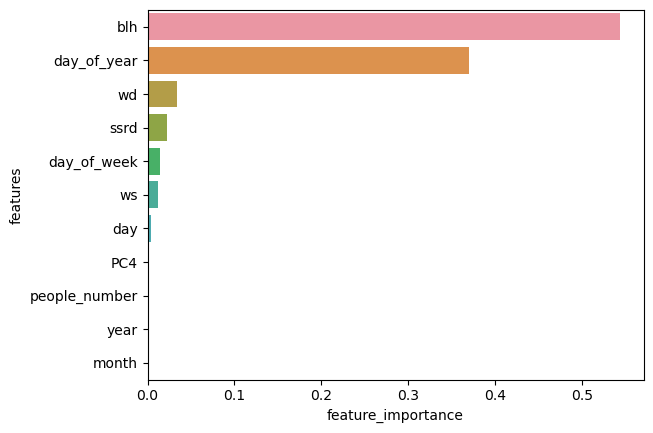

In [105]:
plot_features(X_train.columns, gbr_model.feature_importances_)

<h4><font color=mediumvioletred>Export the best model (GradientBoostingRegressor)</font></h4>

In [106]:
pickle.dump(gbr_model, open("models/gbr_air_quality_prediction_model_removed_outliers.pkl", "wb")) # wb = write binary

<h3><font color=steelblue>Replace pm2.5 outliers with median</font></h3>

<h4><font color=mediumvioletred>Read CSV file</font></h4>

In [107]:
# read prepared dataset csv file
df_replaced_pollution_median_outliers = pd.read_csv("data/df_replaced_pollution_median_outliers.csv")
df_replaced_pollution_median_outliers.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
2467,5611,6195.0,7.707204,141.909743,3.232448,70.694817,514.034414,2021,3,16,1,75
1137,5621,4405.0,10.204138,257.035840,3.577848,55.448945,372.874520,2021,2,4,3,35
39,5622,3039.0,9.087465,225.238109,2.130949,26.251997,171.260119,2021,1,2,5,2
1499,5655,2785.0,24.384687,254.269444,5.280258,18.773460,464.312891,2021,2,15,0,46
5785,5646,13979.0,8.848128,231.208918,2.845098,139.242386,432.852688,2021,6,25,4,176


<h4><font color=mediumvioletred>Get X and y</font></h4>

In [108]:
X = df_replaced_pollution_median_outliers.drop("pm2.5", axis=1)
y = df_replaced_pollution_median_outliers["pm2.5"]

<h4><font color=mediumvioletred>Get a sample of X </font></h4>

In [109]:
X.sample(5)

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
6346,5651,22845.0,211.618270,1.784914,150.591981,348.230049,2021,7,12,0,193
9078,5657,26816.0,226.414387,4.833755,17.279052,706.082537,2021,10,3,6,276
5146,5627,13150.0,139.395160,3.473296,122.996553,399.582305,2021,6,5,5,156
7950,5654,3116.0,108.531540,4.123124,50.740173,585.561877,2021,8,29,6,241
8079,5612,15057.0,39.122731,2.081850,194.052582,498.589487,2021,9,2,3,245


<h4><font color=mediumvioletred>Get a sample of y </font></h4>

In [110]:
y.sample(5)

3780     2.735865
7082    11.151242
6930     2.701120
6913     3.164745
7934     4.593935
Name: pm2.5, dtype: float64

<h4><font color=mediumvioletred>Check shape of the dataframe </font></h4>

In [111]:
df_replaced_pollution_median_outliers.shape

(10626, 12)

<h4><font color=mediumvioletred>Split data into training and testing </font></h4>

In [112]:
df_train = df_replaced_pollution_median_outliers[df_replaced_pollution_median_outliers.month < 8]
df_test = df_replaced_pollution_median_outliers[df_replaced_pollution_median_outliers.month >= 8]

len(df_train), len(df_test)

(6996, 3630)

<h4><font color=mediumvioletred>Split data into X & y </font></h4>

In [113]:
X_train, y_train = df_train.drop("pm2.5", axis=1), df_train["pm2.5"]
X_test, y_test = df_test.drop("pm2.5", axis=1), df_test["pm2.5"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6996, 11), (6996,), (3630, 11), (3630,))

In [114]:
X_train.head()

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
0,5611,6671.0,203.334312,2.886824,35.783607,241.558209,2021,1,1,4,1
1,5656,9330.0,202.914324,2.885721,36.077402,243.613262,2021,1,1,4,1
2,5658,1539.0,203.860565,2.900199,35.915225,240.125790,2021,1,1,4,1
3,5612,5478.0,203.603766,2.890154,35.685987,240.507430,2021,1,1,4,1
4,5625,3793.0,204.119216,2.896506,35.493932,238.454701,2021,1,1,4,1


<h4><font color=mediumvioletred>Model with RandomForestRegressor </font></h4>

In [115]:
rf_model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [116]:
# score model
show_scores(rf_model)

{'Training MAE': 0.07327523803492846, 'Testing MAE': 4.327968551453809}

In [117]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(rf_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10563,26.578117,8.202327,18.375790
10574,26.578117,8.202327,18.375790
10567,26.578117,8.200097,18.378021
10333,26.473959,8.064137,18.409822
10580,26.915167,8.304478,18.610689
10588,26.915167,8.301976,18.613191
10568,26.851381,8.207667,18.643714
10584,26.966311,8.314897,18.651414
10590,26.966311,8.297701,18.668609
10575,26.966311,8.213505,18.752806


<h4><font color=mediumvioletred>Model with SGDClassifier </font></h4>

In [118]:
sgd_model = SGDClassifier(n_jobs=-1,
                        random_state=42)

# fit the model
sgd_model.fit(X_train, y_train.astype(int))

SGDClassifier(n_jobs=-1, random_state=42)

In [119]:
# score model
show_scores(sgd_model)

{'Training MAE': 4.680309929136824, 'Testing MAE': 4.923760670013008}

In [120]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(sgd_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10588,26.915167,7,19.915167
10580,26.915167,7,19.915167
10575,26.966311,7,19.966311
10584,26.966311,7,19.966311
8582,23.628653,3,20.628653
10579,25.661686,3,22.661686
10582,26.212662,3,23.212662
10567,26.578117,3,23.578117
10571,26.578117,3,23.578117
10590,26.966311,3,23.966311


<h4><font color=mediumvioletred>Model with BayesianRidge </font></h4>

In [121]:
br_model = BayesianRidge()

# fit the model
br_model.fit(X_train, y_train)

BayesianRidge()

In [122]:
# score model
show_scores(br_model)

{'Training MAE': 3.6623177818342185, 'Testing MAE': 7.857052382541311}

In [123]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(br_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10563,26.578117,1.024489,25.553629
10574,26.578117,1.009026,25.569091
10567,26.578117,1.003660,25.574457
10571,26.578117,0.995514,25.582603
10568,26.851381,1.068171,25.783211
10584,26.966311,1.137496,25.828814
10580,26.915167,1.031142,25.884025
10575,26.966311,1.081785,25.884526
10588,26.915167,1.023952,25.891215
10590,26.966311,1.008901,25.957409


<h4><font color=mediumvioletred>Model with Lasso </font></h4>

In [124]:
lasso_model = LassoLars(alpha=.1, 
                  normalize=False,
                  random_state=42)

# fit the model
lasso_model.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False, random_state=42)

In [125]:
# score model
show_scores(lasso_model)

{'Training MAE': 3.6841443897533908, 'Testing MAE': 6.518618154887404}

In [126]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(lasso_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10563,26.578117,3.101592,23.476525
10574,26.578117,3.086157,23.491960
10567,26.578117,3.080621,23.497496
10571,26.578117,3.064386,23.513731
10568,26.851381,3.154045,23.697336
10584,26.966311,3.250331,23.715979
10575,26.966311,3.172029,23.794282
10580,26.915167,3.117842,23.797325
10588,26.915167,3.104557,23.810610
10590,26.966311,3.086694,23.879616


<h4><font color=mediumvioletred>Model with ElasticNet </font></h4>

In [127]:
en_model = ElasticNet(random_state=42)

# fit the model
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [128]:
# score model
show_scores(en_model)

{'Training MAE': 3.6840563016730434, 'Testing MAE': 6.350515252679395}

In [129]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(en_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10563,26.578117,3.281729,23.296389
10574,26.578117,3.265955,23.312162
10567,26.578117,3.260261,23.317856
10571,26.578117,3.238834,23.339284
10568,26.851381,3.340498,23.510883
10584,26.966311,3.453342,23.512968
10575,26.966311,3.361315,23.604995
10580,26.915167,3.302663,23.612503
10588,26.915167,3.285358,23.629809
10590,26.966311,3.265679,23.700631


<h4><font color=mediumvioletred>Model with SVR </font></h4>

In [130]:
svr_model = SVR()

# fit the model
svr_model.fit(X_train, y_train)

SVR()

In [131]:
# score model
show_scores(svr_model)

{'Training MAE': 3.9918297186420473, 'Testing MAE': 4.097907296494186}

In [132]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(svr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10570,26.476330,8.951844,17.524485
10581,26.334471,8.809311,17.525160
10585,26.476330,8.906799,17.569531
10580,26.915167,9.338078,17.577089
10568,26.851381,9.089657,17.761724
7125,25.879469,8.098710,17.780759
10575,26.966311,8.942436,18.023875
7095,26.094728,7.697157,18.397572
10584,26.966311,8.047904,18.918406
7124,25.879469,6.704156,19.175313


<h4><font color=mediumvioletred>Model with GradientBoostingRegressor </font></h4>

In [133]:
gbr_model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1, 
                                  max_depth=1,
                                  random_state=42)

# fit the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [134]:
# score model
show_scores(gbr_model)

{'Training MAE': 3.082236678594123, 'Testing MAE': 4.221378855126229}

In [135]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(gbr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10571,26.578117,9.865241,16.712876
10574,26.578117,9.865241,16.712876
10563,26.578117,9.865241,16.712876
10568,26.851381,9.865241,16.986140
10580,26.915167,9.865241,17.049926
10588,26.915167,9.865241,17.049926
10590,26.966311,9.865241,17.101069
10584,26.966311,9.865241,17.101069
10575,26.966311,9.865241,17.101069
10333,26.473959,5.451149,21.022810


<h4><font color=mediumvioletred>Conclusion </font></h4>

After calculating the MAE (average of the absolute differences between predictions and actual values), we found that the following models had the best predictions:
* SVR: 4.097907296494186
* GradientBoostingRegressor: 4.221378855126229
* RandomForestRegressor: 4.327968551453809

<h4><font color=mediumvioletred>Check feature importance</font></h4>

Feature importance means which features affected the model the most.

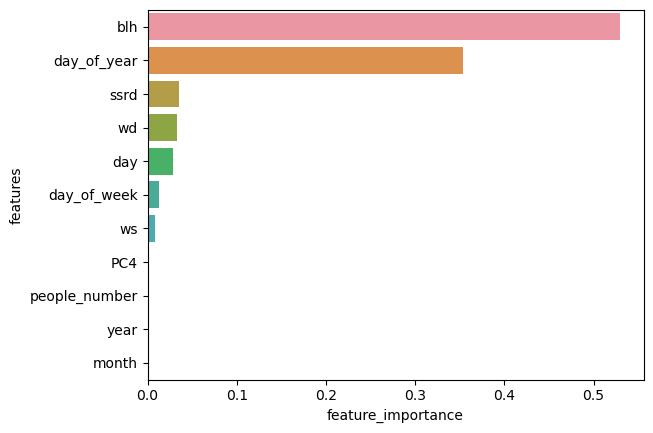

In [136]:
plot_features(X_train.columns, gbr_model.feature_importances_)

<h4><font color=mediumvioletred>Export the best model (SVR)</font></h4>

In [137]:
pickle.dump(svr_model, open("models/svr_air_quality_prediction_model_replaced_median.pkl", "wb")) # wb = write binary

<h3><font color=steelblue>Replace all outliers with IQR</font></h3>

<h4><font color=mediumvioletred>Read CSV file</font></h4>

In [138]:
# read prepared dataset csv file
df_replaced_iqr_outliers = pd.read_csv("data/df_replaced_iqr_outliers.csv")
df_replaced_iqr_outliers.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
9785,5613,12077.0,15.407574,283.881376,3.071120,104.655146,303.300254,2021,10,24,6,297
8286,5655,5018.0,13.438275,263.209340,2.317250,143.420884,302.988436,2021,9,9,3,252
2946,5629,6195.0,21.009609,208.840310,1.993691,214.920651,173.788307,2021,3,31,2,90
2295,5617,4880.0,6.464625,216.870312,7.509646,116.649919,1170.727254,2021,3,11,3,70
2225,5655,4101.0,25.991047,178.920842,3.371683,73.177353,457.001558,2021,3,9,1,68


<h4><font color=mediumvioletred>Get X and y</font></h4>

In [139]:
X = df_replaced_iqr_outliers.drop("pm2.5", axis=1)
y = df_replaced_iqr_outliers["pm2.5"]

<h4><font color=mediumvioletred>Get a sample of X </font></h4>

In [140]:
X.sample(5)

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
483,5644,10552.0,103.470190,2.713176,32.350230,344.119866,2021,1,15,4,15
7477,5646,12616.0,213.228354,3.461513,237.524794,678.440970,2021,8,15,6,227
915,5626,7438.0,241.569648,1.977274,4.441411,182.228587,2021,1,28,3,28
5448,5645,2793.0,62.618717,2.492068,215.432835,513.429310,2021,6,15,1,166
5652,5641,5148.0,74.724196,4.435963,85.984314,609.268753,2021,6,21,0,172


<h4><font color=mediumvioletred>Get a sample of y </font></h4>

In [141]:
y.sample(5)

5140     12.209170
10569    25.661686
2299      6.464625
464      20.832195
9127      3.482301
Name: pm2.5, dtype: float64

<h4><font color=mediumvioletred>Check shape of the dataframe </font></h4>

In [142]:
df_replaced_iqr_outliers.shape

(10626, 12)

<h4><font color=mediumvioletred>Split data into training and testing </font></h4>

In [143]:
df_train = df_replaced_iqr_outliers[df_replaced_iqr_outliers.month < 8]
df_test = df_replaced_iqr_outliers[df_replaced_iqr_outliers.month >= 8]

len(df_train), len(df_test)

(6996, 3630)

<h4><font color=mediumvioletred>Split data into X & y </font></h4>

In [144]:
X_train, y_train = df_train.drop("pm2.5", axis=1), df_train["pm2.5"]
X_test, y_test = df_test.drop("pm2.5", axis=1), df_test["pm2.5"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6996, 11), (6996,), (3630, 11), (3630,))

In [145]:
X_train.head()

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
0,5611,6671.0,203.334312,2.886824,35.783607,241.558209,2021,1,1,4,1
1,5656,9330.0,202.914324,2.885721,36.077402,243.613262,2021,1,1,4,1
2,5658,1539.0,203.860565,2.900199,35.915225,240.125790,2021,1,1,4,1
3,5612,5478.0,203.603766,2.890154,35.685987,240.507430,2021,1,1,4,1
4,5625,3793.0,204.119216,2.896506,35.493932,238.454701,2021,1,1,4,1


<h4><font color=mediumvioletred>Model with RandomForestRegressor </font></h4>

In [146]:
rf_model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [147]:
# score model
show_scores(rf_model)

{'Training MAE': 0.03503734465613962, 'Testing MAE': 5.39585424948297}

In [148]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(rf_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10557,29.985672,8.521763,21.463909
10537,29.985672,8.518593,21.467079
10545,29.985672,8.514904,21.470768
10529,29.985672,8.508220,21.477452
10549,29.985672,8.498606,21.487066
10558,29.985672,8.498487,21.487184
10539,29.985672,8.493875,21.491797
10528,29.985672,8.492649,21.493023
10550,29.985672,8.487547,21.498125
10559,29.985672,8.487327,21.498345


<h4><font color=mediumvioletred>Model with SGDClassifier </font></h4>

In [149]:
sgd_model = SGDClassifier(n_jobs=-1,
                        random_state=42)

# fit the model
sgd_model.fit(X_train, y_train.astype(int))

SGDClassifier(n_jobs=-1, random_state=42)

In [150]:
# score model
show_scores(sgd_model)

{'Training MAE': 5.173199011861699, 'Testing MAE': 6.651697058520041}

In [151]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(sgd_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10553,29.985672,3,26.985672
10552,29.985672,3,26.985672
10551,29.985672,3,26.985672
10550,29.985672,3,26.985672
10549,29.985672,3,26.985672
10483,29.730927,2,27.730927
10519,29.985672,2,27.985672
10504,29.985672,2,27.985672
10493,29.985672,2,27.985672
10506,29.985672,2,27.985672


<h4><font color=mediumvioletred>Model with BayesianRidge </font></h4>

In [152]:
br_model = BayesianRidge()

# fit the model
br_model.fit(X_train, y_train)

BayesianRidge()

In [153]:
# score model
show_scores(br_model)

{'Training MAE': 3.9248136901350974, 'Testing MAE': 10.747735099699833}

In [154]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(br_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10482,29.985672,-4.251525,34.237196
10464,29.985672,-4.251972,34.237644
10473,29.985672,-4.259146,34.244818
10486,29.985672,-4.262777,34.248448
10493,29.985672,-4.268555,34.254226
10484,29.985672,-4.269651,34.255323
10468,29.985672,-4.271847,34.257519
10475,29.985672,-4.283540,34.269212
10481,29.985672,-4.294504,34.280176
10469,29.985672,-4.297539,34.283210


<h4><font color=mediumvioletred>Model with Lasso </font></h4>

In [155]:
lasso_model = LassoLars(alpha=.1, 
                  normalize=False,
                  random_state=42)

# fit the model
lasso_model.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False, random_state=42)

In [156]:
# score model
show_scores(lasso_model)

{'Training MAE': 4.127102080258668, 'Testing MAE': 8.104427981340725}

In [157]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(lasso_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10491,29.985672,0.083067,29.902605
10493,29.985672,0.079193,29.906479
10478,29.985672,0.073539,29.912133
10481,29.985672,0.060048,29.925624
10486,29.985672,0.054437,29.931235
10468,29.985672,0.052024,29.933648
10482,29.985672,0.050895,29.934777
10475,29.985672,0.044410,29.941262
10484,29.985672,0.031590,29.954082
10469,29.985672,0.026524,29.959148


<h4><font color=mediumvioletred>Model with ElasticNet </font></h4>

In [158]:
en_model = ElasticNet(random_state=42)

# fit the model
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [159]:
# score model
show_scores(en_model)

{'Training MAE': 4.118360307820273, 'Testing MAE': 8.002683402928158}

In [160]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(en_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10481,29.985672,0.567991,29.417681
10463,29.985672,0.566675,29.418997
10478,29.985672,0.560308,29.425364
10485,29.985672,0.551125,29.434547
10468,29.985672,0.544480,29.441191
10486,29.985672,0.541522,29.444149
10475,29.985672,0.537129,29.448543
10482,29.985672,0.528711,29.456960
10469,29.985672,0.515557,29.470114
10484,29.985672,0.507355,29.478316


<h4><font color=mediumvioletred>Model with SVR </font></h4>

In [161]:
svr_model = SVR()

# fit the model
svr_model.fit(X_train, y_train)

SVR()

In [162]:
# score model
show_scores(svr_model)

{'Training MAE': 4.84351971793446, 'Testing MAE': 5.072962909507303}

In [163]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(svr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
9321,29.985672,7.999013,21.986659
9330,29.985672,7.996477,21.989194
9329,29.714216,7.660242,22.053974
10501,29.985672,7.814236,22.171435
10427,29.985672,7.801954,22.183717
9324,29.985672,7.498804,22.486868
9314,29.985672,7.462084,22.523588
10398,29.985672,7.342495,22.643177
10410,29.985672,7.336938,22.648734
10473,29.985672,7.139846,22.845826


<h4><font color=mediumvioletred>Model with GradientBoostingRegressor </font></h4>

In [164]:
gbr_model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1, 
                                  max_depth=1,
                                  random_state=42)

# fit the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [165]:
# score model
show_scores(gbr_model)

{'Training MAE': 3.3402946957555257, 'Testing MAE': 4.2895217898243505}

In [166]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(gbr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
10411,29.985672,10.260183,19.725488
10421,29.985672,10.260183,19.725488
10419,29.985672,10.260183,19.725488
10418,29.985672,10.260183,19.725488
10417,29.985672,10.260183,19.725488
10416,29.985672,10.260183,19.725488
10415,29.985672,10.260183,19.725488
10414,29.985672,10.260183,19.725488
10420,29.985672,10.260183,19.725488
10397,29.985672,10.260183,19.725488


<h4><font color=mediumvioletred>Conclusion </font></h4>

After calculating the MAE (average of the absolute differences between predictions and actual values), we found that the following model had the best predictions:
* GradientBoostingRegressor: 4.2895217898243505

<h4><font color=mediumvioletred>Check feature importance</font></h4>

Feature importance means which features affected the model the most.

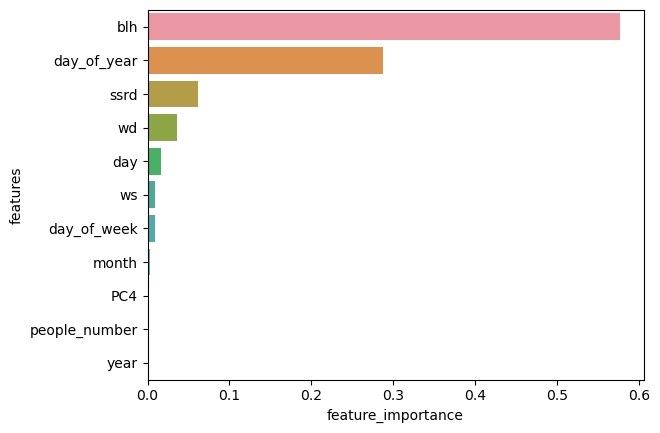

In [167]:
plot_features(X_train.columns, gbr_model.feature_importances_)

<h4><font color=mediumvioletred>Export the best model (GradientBoostingRegressor)</font></h4>

In [168]:
pickle.dump(gbr_model, open("models/gbr_air_quality_prediction_model_replaced_iqr.pkl", "wb")) # wb = write binary

<h2><font color=slateblue>Modelling using weekly data after handling outliers</font></h2>


[Outliers Handling notebook](http://localhost:8888/notebooks/outliers_handling.ipynb)

<h3><font color=steelblue>Replace all outliers with IQR</font></h3>

<h4><font color=mediumvioletred>Read CSV file</font></h4>

In [169]:
# read prepared dataset csv file
df_replaced_iqr_outliers_weekly = pd.read_csv("data/df_replaced_iqr_outliers_weekly.csv")
df_replaced_iqr_outliers_weekly.sample(5)

,Unnamed: 0,PC4,week_number,pm2.5,wd,ws,ssrd,blh,people_number,season
905,905,5641,13,12.394910,168.815727,3.170439,172.863854,493.328382,29800.00,1
755,755,5631,4,18.247696,179.248376,4.215613,36.603427,506.777157,40462.00,4
732,732,5629,28,6.082784,123.231748,3.481224,164.444639,507.288137,62244.00,2
1217,1217,5651,43,10.337742,257.792957,4.707513,59.040255,566.011750,144309.75,3
409,409,5622,34,4.039774,93.742122,3.792641,153.761835,666.911312,29173.00,2


<h4><font color=mediumvioletred>Get X and y</font></h4>

In [170]:
X = df_replaced_iqr_outliers_weekly.drop("pm2.5", axis=1)
y = df_replaced_iqr_outliers_weekly["pm2.5"]

<h4><font color=mediumvioletred>Get a sample of X </font></h4>

In [171]:
X.sample(5)

,Unnamed: 0,PC4,week_number,wd,ws,ssrd,blh,people_number,season
1040,1040,5644,7,259.451434,4.877860,71.387116,511.996385,72979.0,4
780,780,5631,29,115.485914,2.344617,243.037071,538.184714,69012.0,2
282,282,5617,1,123.156322,3.175712,21.080018,380.805953,30336.0,4
588,588,5626,25,126.468692,3.119736,163.707787,568.159335,103635.0,2
347,347,5621,19,208.163997,2.524131,197.356931,607.014363,41360.0,1


<h4><font color=mediumvioletred>Get a sample of y </font></h4>

In [172]:
y.sample(5)

1469    12.741724
706     18.103374
1136    24.980290
155     10.150864
916      5.060104
Name: pm2.5, dtype: float64

<h4><font color=mediumvioletred>Check shape of the dataframe </font></h4>

In [173]:
df_replaced_iqr_outliers_weekly.shape

(1551, 10)

<h4><font color=mediumvioletred>Split data into training and testing </font></h4>

In [174]:
df_train = df_replaced_iqr_outliers_weekly[df_replaced_iqr_outliers_weekly.week_number < 38]
df_test = df_replaced_iqr_outliers_weekly[df_replaced_iqr_outliers_weekly.week_number >= 38]

len(df_train), len(df_test)

(1221, 330)

<h4><font color=mediumvioletred>Split data into X & y </font></h4>

In [175]:
X_train, y_train = df_train.drop("pm2.5", axis=1), df_train["pm2.5"]
X_test, y_test = df_test.drop("pm2.5", axis=1), df_test["pm2.5"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1221, 9), (1221,), (330, 9), (330,))

In [176]:
X_train.head()

,Unnamed: 0,PC4,week_number,wd,ws,ssrd,blh,people_number,season
0,0,5611,1,123.293868,3.169226,21.003068,380.154143,56363.0,4
1,1,5611,2,170.959204,3.947350,28.768378,514.523046,46168.0,4
2,2,5611,3,226.749867,5.545059,31.376184,743.564144,43290.0,4
3,3,5611,4,179.247086,4.212432,36.637785,508.880534,37026.0,4
4,4,5611,5,176.705833,3.939258,27.139008,397.774059,32090.0,4


<h4><font color=mediumvioletred>Model with RandomForestRegressor </font></h4>

In [177]:
rf_model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [178]:
# score model
show_scores(rf_model)

{'Training MAE': 0.023287286925096466, 'Testing MAE': 4.311823313460197}

In [179]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(rf_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
187,24.98029,14.349965,10.630325
93,24.98029,14.349965,10.630325
281,24.98029,14.349965,10.630325
46,24.98029,14.348555,10.631735
45,24.98029,14.347987,10.632303
92,24.98029,14.347987,10.632303
280,24.98029,14.345390,10.634900
233,24.98029,14.345390,10.634900
186,24.98029,14.345390,10.634900
139,24.98029,14.344609,10.635681


<h4><font color=mediumvioletred>Model with SGDClassifier </font></h4>

In [180]:
sgd_model = SGDClassifier(n_jobs=-1,
                        random_state=42)

# fit the model
sgd_model.fit(X_train, y_train.astype(int))

SGDClassifier(n_jobs=-1, random_state=42)

In [181]:
# score model
show_scores(sgd_model)

{'Training MAE': 5.526574604215853, 'Testing MAE': 9.135800901584286}

In [182]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(sgd_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
138,24.98029,4,20.98029
749,24.98029,4,20.98029
1172,24.98029,4,20.98029
796,24.98029,4,20.98029
91,24.98029,4,20.98029
609,24.98029,4,20.98029
608,24.98029,4,20.98029
1454,24.98029,4,20.98029
1078,24.98029,4,20.98029
279,24.98029,4,20.98029


<h4><font color=mediumvioletred>Model with BayesianRidge </font></h4>

In [183]:
br_model = BayesianRidge()

# fit the model
br_model.fit(X_train, y_train)

BayesianRidge()

In [184]:
# score model
show_scores(br_model)

{'Training MAE': 2.291357703728488, 'Testing MAE': 6.775836801213102}

In [185]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(br_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
1456,24.98029,8.841594,16.138696
328,24.98029,8.841305,16.138985
1503,24.98029,8.836707,16.143583
657,24.98029,8.821094,16.159196
610,24.98029,8.821085,16.159205
704,24.98029,8.790715,16.189575
751,24.98029,8.782200,16.198090
798,24.98029,8.774635,16.205655
845,24.98029,8.773706,16.206584
892,24.98029,8.724910,16.255380


<h4><font color=mediumvioletred>Model with Lasso </font></h4>

In [186]:
lasso_model = LassoLars(alpha=.1, 
                  normalize=False,
                  random_state=42)

# fit the model
lasso_model.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False, random_state=42)

In [187]:
# score model
show_scores(lasso_model)

{'Training MAE': 2.3035377807323214, 'Testing MAE': 6.871656729005752}

In [188]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(lasso_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
469,24.98029,8.657682,16.322608
328,24.98029,8.656878,16.323412
1080,24.98029,8.655425,16.324866
187,24.98029,8.653970,16.326320
140,24.98029,8.643358,16.336932
798,24.98029,8.641060,16.339231
892,24.98029,8.635571,16.344719
93,24.98029,8.634177,16.346114
1456,24.98029,8.627841,16.352449
46,24.98029,8.613045,16.367246


<h4><font color=mediumvioletred>Model with ElasticNet </font></h4>

In [189]:
en_model = ElasticNet(random_state=42)

# fit the model
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [190]:
# score model
show_scores(en_model)

{'Training MAE': 2.3964530320616455, 'Testing MAE': 6.9207657134660705}

In [191]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(en_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
469,24.98029,8.845914,16.134376
1221,24.98029,8.844776,16.135514
798,24.98029,8.843811,16.136479
234,24.98029,8.840187,16.140103
187,24.98029,8.831223,16.149067
1080,24.98029,8.825601,16.154689
140,24.98029,8.819044,16.161247
93,24.98029,8.810550,16.169740
1456,24.98029,8.802486,16.177804
46,24.98029,8.782734,16.197556


<h4><font color=mediumvioletred>Model with SVR </font></h4>

In [192]:
svr_model = SVR()

# fit the model
svr_model.fit(X_train, y_train)

SVR()

In [193]:
# score model
show_scores(svr_model)

{'Training MAE': 3.87641261239471, 'Testing MAE': 6.151710398941301}

In [194]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(svr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
138,24.98029,9.325376,15.654915
44,24.98029,9.320117,15.660173
185,24.98029,9.317006,15.663284
1172,24.98029,9.304014,15.676277
561,24.98029,9.302947,15.677343
467,24.98029,9.301024,15.679266
373,24.98029,9.300365,15.679925
1501,24.98029,9.133917,15.846374
1219,24.98029,8.219726,16.760564
1454,24.98029,6.901545,18.078745


<h4><font color=mediumvioletred>Model with GradientBoostingRegressor </font></h4>

In [195]:
gbr_model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1, 
                                  max_depth=1,
                                  random_state=42)

# fit the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [196]:
# score model
show_scores(gbr_model)

{'Training MAE': 1.150040272567119, 'Testing MAE': 5.712817279314228}

In [197]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(gbr_model)
df_scores.sort_values(by="differences").tail(10)

,actual values,predicted values,differences
421,24.98029,15.085227,9.895063
938,24.98029,15.085227,9.895063
280,24.98029,15.085227,9.895063
139,24.98029,15.085227,9.895063
703,24.98029,15.085227,9.895063
233,24.98029,15.085227,9.895063
1455,24.98029,15.085227,9.895063
1126,24.98029,15.085227,9.895063
374,24.98029,15.085227,9.895063
1314,24.98029,15.085227,9.895063


<h4><font color=mediumvioletred>Conclusion </font></h4>

After calculating the MAE (average of the absolute differences between predictions and actual values), we found that the following model had the best predictions:
* RandomForestRegressor: 4.311823313460197
* GradientBoostingRegressor: 5.712817279314228

<h4><font color=mediumvioletred>Check feature importance</font></h4>

Feature importance means which features affected the model the most.

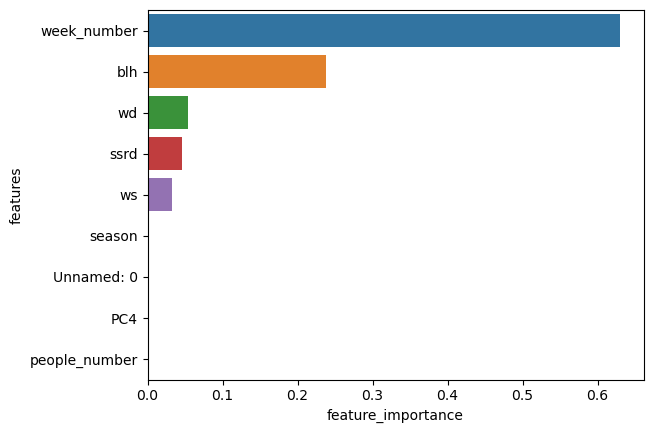

In [198]:
plot_features(X_train.columns, rf_model.feature_importances_)

<h4><font color=mediumvioletred>Export the best model (RandomForestRegressor)</font></h4>

In [199]:
pickle.dump(rf_model, open("models/rf_air_quality_prediction_model_replaced_iqr_weekly.pkl", "wb")) # wb = write binary

<h2><font color=slateblue>Conclusion</font></h2>

After modelling using different methods (with and without outliers, daily and weekly grouped data), we got the following results:

**1. Unhandled outliers:**
* Daily grouped data:

    GradientBoostingRegressor => average 5 and max difference 36


* Weekly grouped data:

    RandomForestRegressor => average 6.07 and max difference 20.5


**2. Handled outliers:**
* Daily grouped data:

    1. Replaced all outliers with IQR:

        GradientBoostingRegressor => average 4.28 and max difference 20

    2. Replaced pm2.5 outliers with median:

        SVR => average 4.09 and max difference 19.17

    3. Removed pm2.5 outliers:

        GradientBoostingRegressor => average 4.31 and max difference 19.14
       
       
* Weekly grouped data:

    1. Replaced all outliers with IQR:
    
       RandomForestRegressor =>  average 4.31 and max difference 10.63
       
***

From the results above, we can conclude that after handling the outliers in three different ways, the model has improved in both the daily grouped data and the weekly grouped data.

However, the maximum difference is still too high. This, in our opinion, is due to a lack of sufficient correlation between the columns and our target variable.

Making a clear distinction between the various areas of Eindhoven and the number of people traveling through the city should be taken into account in order to potentially improve the prediction.

***